In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('result.csv')
df["duration_mins"] = df["duration_ms"]/60000
df.drop(columns="duration_ms", inplace=True)
df = df.sort_values(by='year', ascending=True)
df

,acousticness,artists,danceability,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence,year,Song,Weeks on Chart,Average Previous Week Position,Week Position,duration_mins
2315,0.6570,doris day,0.834,0.284,0.000002,3,0.0676,-13.497,32,0.1020,92.224,0.684,1945,everybody loves a lover,12,24,14,2.674450
7656,0.9740,bing crosby,0.111,0.184,0.045600,8,0.1110,-15.011,27,0.0344,76.416,0.214,1945,silent night,2,64,54,2.614450
7201,0.8830,gene autry,0.632,0.159,0.000000,8,0.2220,-14.056,35,0.0492,142.110,0.644,1947,rudolph the rednosed reindeer,12,35,16,3.112217
6797,0.8480,roy orbison,0.400,0.205,0.000000,7,0.4000,-11.794,1,0.0270,79.545,0.357,1947,pretty paper,7,28,15,2.756000
3321,0.7990,gene autry,0.834,0.372,0.000000,1,0.2750,-11.990,40,0.0358,96.628,0.976,1947,here comes santa claus right down santa claus ...,10,45,26,2.504450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10240,0.0210,bad bunny,0.860,0.758,0.000065,11,0.3440,-5.160,92,0.0695,97.014,0.453,2020,yo perreo sola,17,67,59,2.868783
6500,0.0878,meek mill,0.730,0.772,0.000000,5,0.4010,-3.883,75,0.3160,147.053,0.403,2020,otherside of america,2,64,87,3.635050
5257,0.1620,chase rice,0.681,0.726,0.000000,7,0.1190,-5.100,76,0.0453,84.980,0.819,2020,lonely if you are,6,94,91,2.945483
2986,0.1320,niko moon,0.790,0.646,0.000000,5,0.2950,-5.878,67,0.0447,138.047,0.641,2020,good time,25,59,20,3.578450


In [3]:
df = df.drop(columns=['artists', 'Song'])

                                acousticness  danceability    energy  \
acousticness                        1.000000     -0.235610 -0.593835   
danceability                       -0.235610      1.000000  0.128300   
energy                             -0.593835      0.128300  1.000000   
instrumentalness                   -0.017156      0.026163  0.019233   
key                                -0.012698      0.016722  0.015154   
liveness                           -0.009568     -0.109761  0.133140   
loudness                           -0.394203      0.066233  0.692403   
popularity                         -0.263510      0.139215  0.185507   
speechiness                        -0.140098      0.257697  0.112140   
tempo                              -0.114043     -0.181278  0.168415   
valence                            -0.129130      0.416358  0.332846   
year                               -0.392767      0.184069  0.301829   
Weeks on Chart                     -0.146295      0.099847  0.08

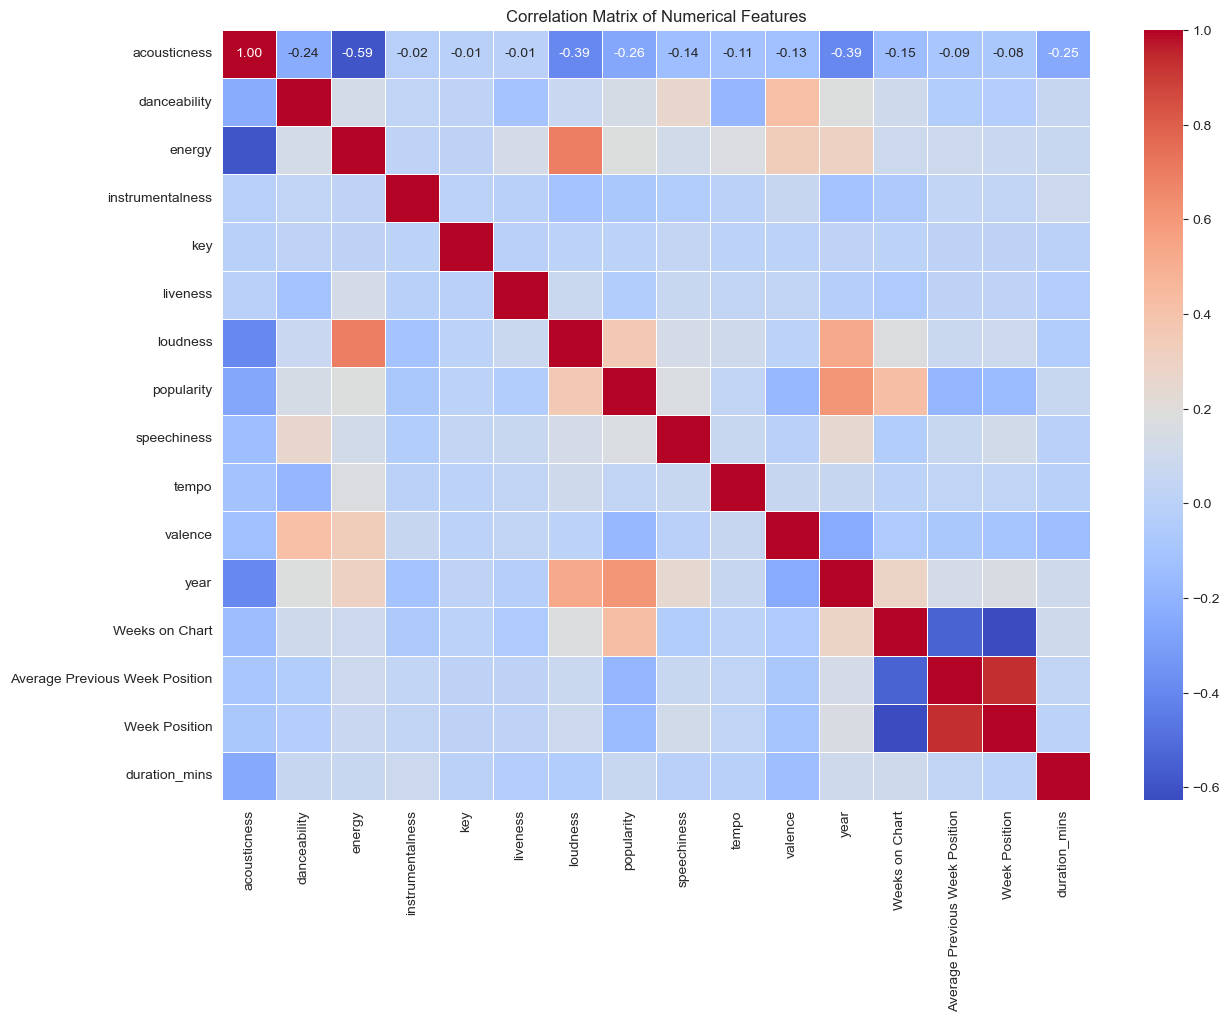

Correlation with Popularity:
 popularity                        1.000000
year                              0.606881
Weeks on Chart                    0.425448
loudness                          0.361328
energy                            0.185507
speechiness                       0.163280
danceability                      0.139215
duration_mins                     0.064746
tempo                             0.029860
key                               0.004158
liveness                         -0.045048
instrumentalness                 -0.078652
Week Position                    -0.156383
valence                          -0.173771
Average Previous Week Position   -0.186007
acousticness                     -0.263510
Name: popularity, dtype: float64


In [4]:
from matplotlib import pyplot as plt

correlation_matrix = df.corr()
print(correlation_matrix)

plt.figure(figsize=(14, 10))

# seaborn 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
popularity_corr = correlation_matrix['popularity'].sort_values(ascending=False)
print("Correlation with Popularity:\n", popularity_corr)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

X = df[['year', 'Weeks on Chart', 'loudness', 'energy', 'speechiness', 
        'danceability', 'duration_mins', 'tempo', 'key', 'liveness', 
        'instrumentalness', 'Week Position', 'valence', 
        'Average Previous Week Position', 'acousticness']]
y = df['popularity']

y = (y >= y.median()).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print("SVC Classification Report:\n", classification_report(y_test, y_pred_svc))



KNN Accuracy: 0.715168806466952
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.73      0.72      1041
           1       0.72      0.70      0.71      1062

    accuracy                           0.72      2103
   macro avg       0.72      0.72      0.72      2103
weighted avg       0.72      0.72      0.72      2103

SVC Accuracy: 0.7456015216357584
SVC Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.77      0.75      1041
           1       0.76      0.72      0.74      1062

    accuracy                           0.75      2103
   macro avg       0.75      0.75      0.75      2103
weighted avg       0.75      0.75      0.75      2103


In [6]:
from sklearn.model_selection import GridSearchCV

knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_grid.fit(X_train, y_train)

print("Best KNN Parameters:", knn_grid.best_params_)
best_knn = knn_grid.best_estimator_
y_pred_best_knn = best_knn.predict(X_test)

print("Best KNN Accuracy:", accuracy_score(y_test, y_pred_best_knn))
print("Best KNN Classification Report:\n", classification_report(y_test, y_pred_best_knn))



Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Best KNN Accuracy: 0.7417974322396577
Best KNN Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.76      0.74      1041
           1       0.76      0.72      0.74      1062

    accuracy                           0.74      2103
   macro avg       0.74      0.74      0.74      2103
weighted avg       0.74      0.74      0.74      2103


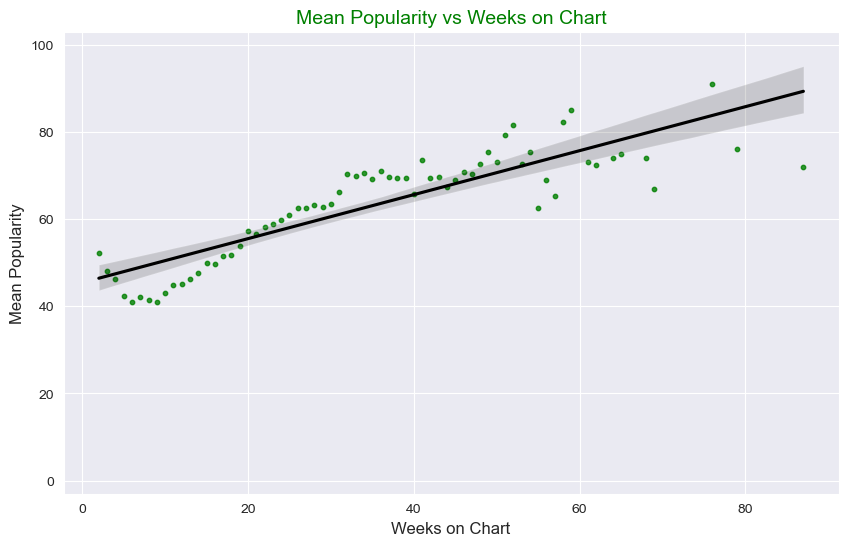

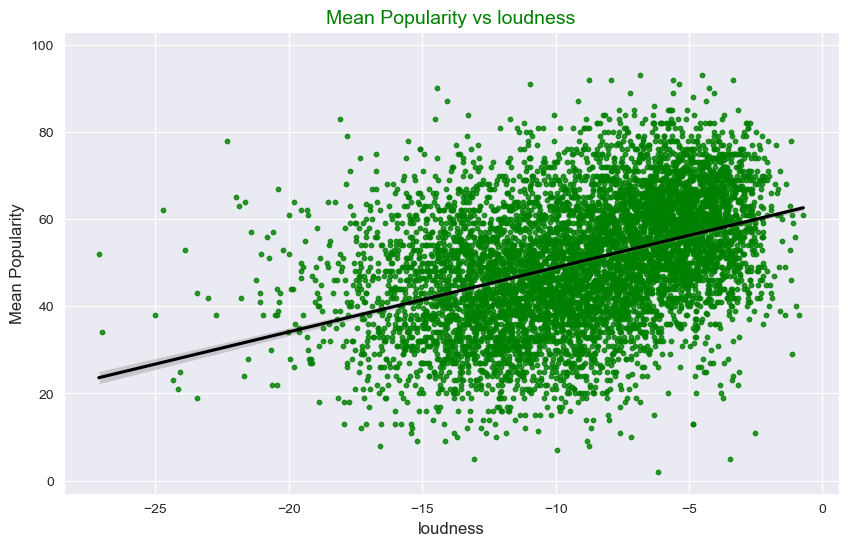

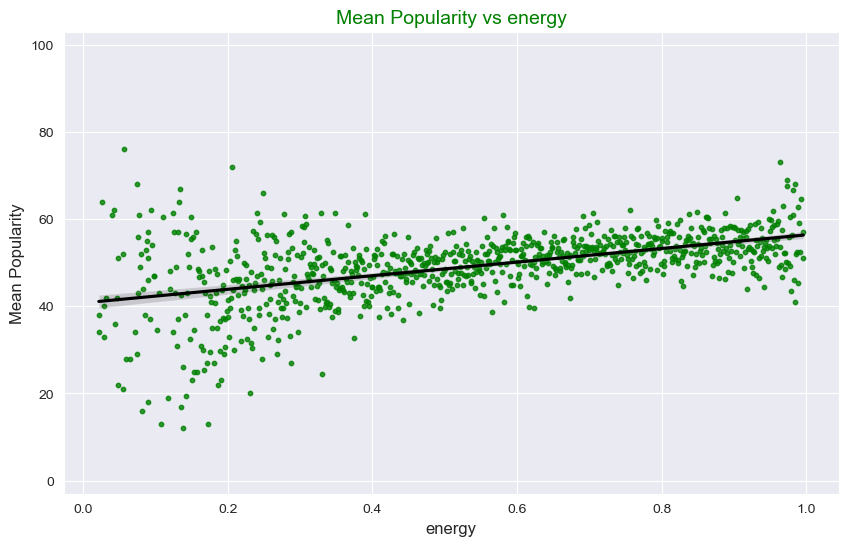

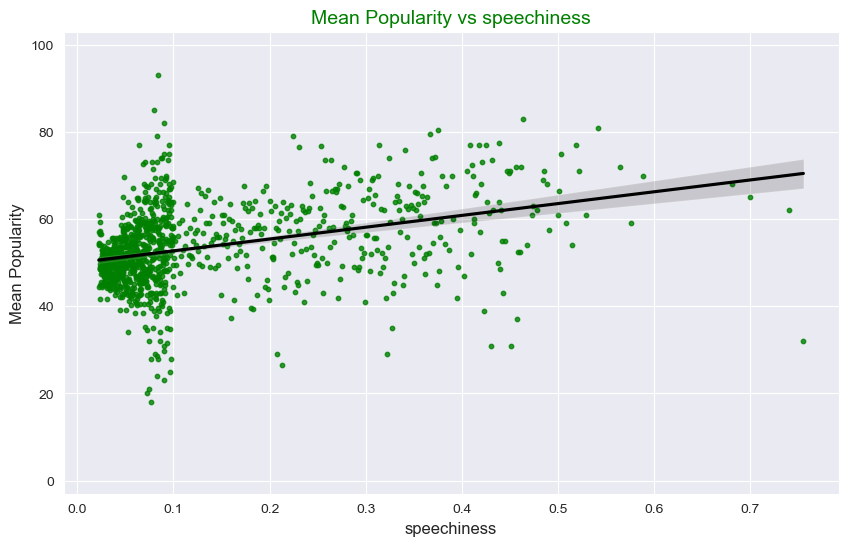

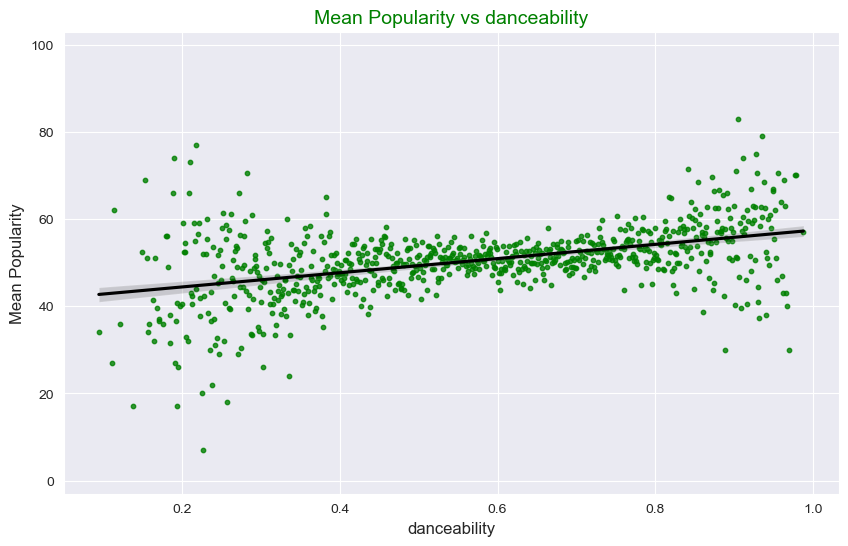

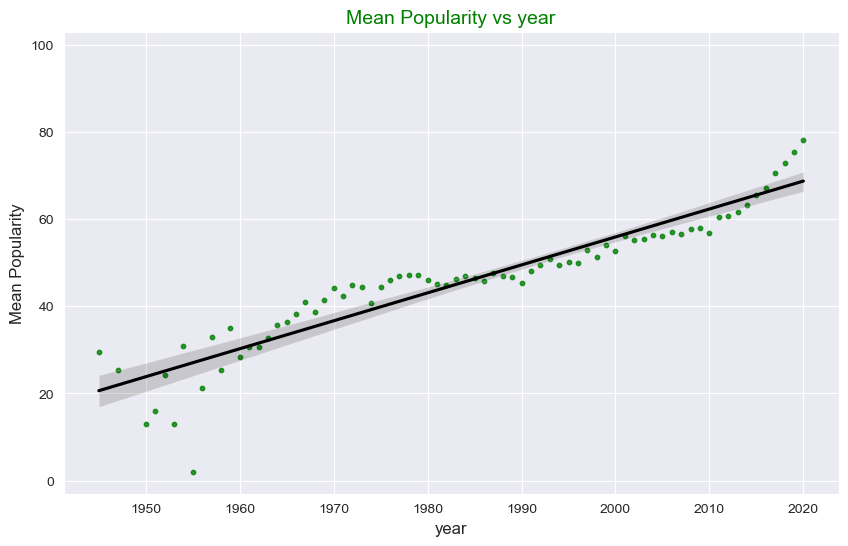

In [7]:

def regress_plot(x, y, data, xlab, ylab, titl):
    # Group data by x and calculate the mean of y
    data = data.groupby(x)[y].mean().reset_index()
    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.regplot(x=x, y=y, data=data, scatter_kws={'color': 'g', "s": 10}, line_kws={'color': 'black'})
    plt.xlabel(xlab, fontsize=12)
    plt.ylabel(ylab, fontsize=12)
    plt.title(titl, fontsize=14, color='green')
    plt.ylim(-3, 103)
    plt.show()

# Assuming df is your DataFrame containing the data
df_filtered = df[(df['year'] >= 1945) & (df['year'] <= 2020)]

# List of features to plot, including 'year'
features = ['Weeks on Chart', 'loudness', 'energy', 'speechiness', 'danceability', 'year']

# Plotting each feature against popularity
for feature in features:
    regress_plot(
        x=feature,
        y='popularity',
        data=df_filtered,
        xlab=feature,
        ylab='Mean Popularity',
        titl=f'Mean Popularity vs {feature}'
    )


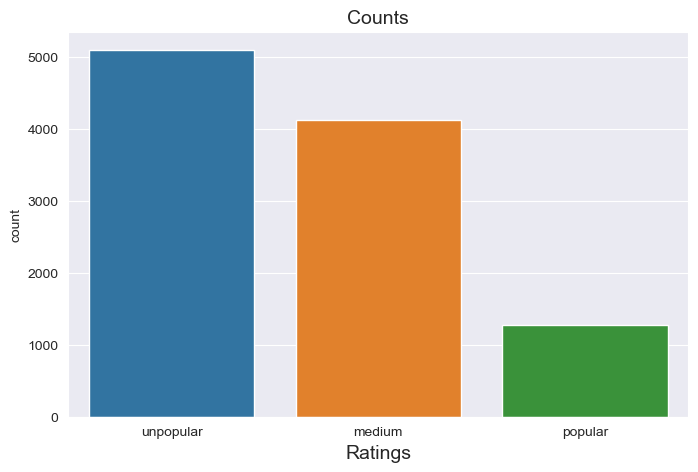

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
classified = df.copy()
classified['pop_rating'] = ''
for i, row in classified.iterrows():
    score = 'unpopular'
    if (row.popularity > 50) & (row.popularity < 70):
        score = 'medium'
    elif row.popularity >= 70:
        score = 'popular'
    classified.at[i, 'pop_rating'] = score

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
_ = sns.countplot(x='pop_rating', data=classified)
_ = plt.xlabel('Ratings', fontsize=14)
_ = plt.title('Counts', fontsize=14)
plt.show()


In [9]:
data = df.copy()
data.loc[((df.popularity >= 0) & (df.popularity <= 50)), "popularity_level" ] = 1
data.loc[((df.popularity > 50) & (df.popularity <= 70)), "popularity_level" ] = 2
data.loc[((df.popularity > 70) & (df.popularity <= 100)), "popularity_level" ] = 3
data["popularity_level"] = data["popularity_level"].astype("int")
data['popularity_level'].value_counts()

popularity_level
1    5102
2    4292
3    1117
Name: count, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

# Define target variable 'y' and features 'X'
y = data['popularity_level']
X = data.drop(columns=['popularity_level'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [11]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

# Define the preprocessing steps
preprocessor = ColumnTransformer([
    ('minmax', MinMaxScaler(), [
        'year', 'tempo', 'duration_mins', 'Weeks on Chart', 'loudness', 
        'energy', 'speechiness', 'danceability', 'liveness', 
        'instrumentalness', 'valence', 'Average Previous Week Position', 
        'acousticness'
    ]),
    ('categorical', OneHotEncoder(), ['key'])
], remainder='passthrough')

# Fit the preprocessor on the training data
preprocessor.fit(X_train)

# Transform the training and test data
X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)
print(f"X_train_preprocessed shape: {X_train_preprocessed.shape}")
print(f"X_test_preprocessed shape: {X_test_preprocessed.shape}")



X_train_preprocessed shape: (7883, 27)
X_test_preprocessed shape: (2628, 27)


In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold

results = []
def run_model(model, alg_name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cross_val_scores = cross_val_score(model, X_train, y_train, cv=6)
    cr = classification_report(y_test, y_pred)
    results.append((alg_name, accuracy, model))  
    # Print results
    print(f"Model: {alg_name}")
    print(f"Accuracy on Test Set for {alg_name} = {accuracy:.2f}\n")
    print(cr)
    print(f"{alg_name}: CrossVal Accuracy Mean: {cross_val_scores.mean():.2f} and Standard Deviation: {cross_val_scores.std():.2f} \n")


In [13]:
# K-Nearest Neighbors Classifier
model = KNeighborsClassifier()
run_model(model, "Nearest Neighbors Classifier", X_train, X_test, y_train, y_test)


Model: Nearest Neighbors Classifier
Accuracy on Test Set for Nearest Neighbors Classifier = 0.92

              precision    recall  f1-score   support

           1       0.96      0.94      0.95      1297
           2       0.87      0.93      0.90      1062
           3       0.89      0.75      0.82       269

    accuracy                           0.92      2628
   macro avg       0.91      0.87      0.89      2628
weighted avg       0.92      0.92      0.92      2628

Nearest Neighbors Classifier: CrossVal Accuracy Mean: 0.91 and Standard Deviation: 0.01 


In [14]:
# Ensure stratified splitting of the data
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
# Define and run the model
def run_model(model, alg_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # Perform Stratified K-Fold cross-validation
    skf = StratifiedKFold(n_splits=6)
    scores = cross_val_score(model, X_train, y_train, cv=skf)
    cr = classification_report(y_test, y_pred)
    # Store results
    results.append((alg_name, accuracy, model))
    print(f"Model: {alg_name}")
    print(f"Accuracy on Test Set for {alg_name} = {accuracy:.2f}\n")
    print(cr)
    print(f"{alg_name}: CrossVal Accuracy Mean: {scores.mean():.2f} and Standard Deviation: {scores.std():.2f} \n")

# Example with SVM Classifier
model = SVC(kernel='poly', degree=3, C=1)
run_model(model, "SVM Classifier")

Model: SVM Classifier
Accuracy on Test Set for SVM Classifier = 0.76

              precision    recall  f1-score   support

           1       0.87      0.85      0.86      1021
           2       0.66      0.85      0.74       859
           3       0.00      0.00      0.00       223

    accuracy                           0.76      2103
   macro avg       0.51      0.56      0.53      2103
weighted avg       0.69      0.76      0.72      2103

SVM Classifier: CrossVal Accuracy Mean: 0.75 and Standard Deviation: 0.01 


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# Define your ColumnTransformer
ctr = ColumnTransformer(
    transformers=[
        ('minmax', MinMaxScaler(), ['year', 'tempo', 'duration_mins', 'Weeks on Chart', 'loudness', 'energy', 'speechiness', 'danceability', 'liveness', 'instrumentalness', 'valence', 'Average Previous Week Position', 'acousticness']),
        ('categorical', OneHotEncoder(), ['key'])
    ],
    remainder='passthrough'
)

# Example training data
X_train = pd.DataFrame({
    'year': [2021, 2022],
    'tempo': [120, 130],
    'duration_mins': [3.5, 4.0],
    'Weeks on Chart': [5, 10],
    'loudness': [-5, -6],
    'energy': [0.7, 0.8],
    'speechiness': [0.03, 0.04],
    'danceability': [0.6, 0.65],
    'liveness': [0.1, 0.2],
    'instrumentalness': [0.0, 0.1],
    'valence': [0.5, 0.6],
    'Average Previous Week Position': [30, 20],
    'acousticness': [0.02, 0.03],
    'key': [1, 2]
})
y_train = [1, 2]  # Example target values

# Fit the ColumnTransformer on the training data
X_train_preprocessed = ctr.fit_transform(X_train)
nearest_neighbors_model = KNeighborsClassifier(n_neighbors=2) 
nearest_neighbors_model.fit(X_train_preprocessed, y_train)

# Example new data 
new_data = pd.DataFrame({
    'year': [2024],
    'tempo': [120],
    'duration_mins': [3.5],
    'Weeks on Chart': [5],
    'loudness': [-5],
    'energy': [0.7],
    'speechiness': [0.03],
    'danceability': [0.6],
    'liveness': [0.1],
    'instrumentalness': [0.0],
    'valence': [0.5],
    'Average Previous Week Position': [30],
    'acousticness': [0.02],
    'key': [1]
})

# Transform new data
new_data_preprocessed = ctr.transform(new_data)

# Make predictions
predictions = nearest_neighbors_model.predict(new_data_preprocessed)
probabilities = nearest_neighbors_model.predict_proba(new_data_preprocessed)

print("Predicted Popularity Level:", predictions)
print("Class Probabilities:", probabilities)
# Check if the transformed new data has the expected shape
print("New Data Preprocessed Shape:", new_data_preprocessed.shape)
# Check transformer and model information
print("ColumnTransformer:", ctr)
print("KNeighborsClassifier:", nearest_neighbors_model)



Predicted Popularity Level: [1]
Class Probabilities: [[0.5 0.5]]
New Data Preprocessed Shape: (1, 15)
ColumnTransformer: ColumnTransformer(remainder='passthrough',
                  transformers=[('minmax', MinMaxScaler(),
                                 ['year', 'tempo', 'duration_mins',
                                  'Weeks on Chart', 'loudness', 'energy',
                                  'speechiness', 'danceability', 'liveness',
                                  'instrumentalness', 'valence',
                                  'Average Previous Week Position',
                                  'acousticness']),
                                ('categorical', OneHotEncoder(), ['key'])])
KNeighborsClassifier: KNeighborsClassifier(n_neighbors=2)
